In [67]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout, MaxPooling2D
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [68]:
input = Input(shape=(112, 112, 3))

# block 1
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input)
conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPool2D(pool_size=(2, 2))(conv2)

# block 2
conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv3)
pool2 = MaxPool2D(pool_size=(2, 2))(conv4)

# block 3
conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
conv6 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv5)
pool3 = MaxPool2D(pool_size=(2, 2))(conv6)

# block 4
conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
conv8 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv7)
pool4 = MaxPool2D(pool_size=(2, 2))(conv8)

# block 5
flatten = Flatten()(pool4)
dense1 = Dense(1024, activation='relu')(flatten)
dropout1 = Dropout(0.5)(dense1)
dense2 = Dense(512, activation='relu')(dropout1)
dropout2 = Dropout(0.5)(dense2)

# output layer
output = Dense(4, activation='softmax')(dropout2)

model = Model(inputs=input, outputs=output)

In [69]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [70]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 112, 112, 3)]     0         
                                                                 
 conv2d_35 (Conv2D)          (None, 112, 112, 32)      896       
                                                                 
 conv2d_36 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 56, 56, 64)        18496     
                                                                 
 conv2d_38 (Conv2D)          (None, 56, 56, 64)        36928     
                                                           

In [71]:
N = 1600
x_train = np.zeros((N, 112, 112, 3), 'float')
y_train = np.zeros((N), 'float')

count = 0
class_labels = sorted(os.listdir("Dataset/train"))
for i, class_label in enumerate(class_labels):
    image_files = sorted(os.listdir(os.path.join("Dataset/train", class_label)))
    for image_file in image_files:
        im = cv2.imread(os.path.join("Dataset/train", class_label, image_file))
        im = cv2.resize(im, (112, 112))
        x_train[count, :, :, :] = im / 255.
        y_train[count] = i
        count += 1

y_train = to_categorical(y_train)
print('x_train', x_train.shape)
print('y_train', y_train.shape)

N2 = 200
x_valid = np.zeros((N2, 112, 112, 3), 'float')
y_valid = np.zeros((N2), 'float')

count2 = 0
class_labels = sorted(os.listdir("Dataset/val"))
for j, class_label in enumerate(class_labels):
    image_files = sorted(os.listdir(os.path.join("Dataset/val", class_label)))
    for image_file in image_files:
        im = cv2.imread(os.path.join("Dataset/val", class_label, image_file))
        im = cv2.resize(im, (112, 112))
        x_valid[count2, :, :, :] = im / 255.
        y_valid[count2] = j
        count2 += 1

y_valid = to_categorical(y_valid)
print('x_valid', x_valid.shape)
print('y_valid', y_valid.shape)

x_train (1600, 112, 112, 3)
y_train (1600, 4)
x_valid (200, 112, 112, 3)
y_valid (200, 4)


In [72]:
# Train Model
h = model.fit(x_train, y_train, validation_data=(
    x_valid, y_valid), epochs=10, batch_size=64, verbose=1)


Epoch 1/10
25/25 [==============================] - 55s 2s/step - loss: 147.1099 - accuracy: 0.2425 - val_loss: 1.3882 - val_accuracy: 0.2500
Epoch 2/10
25/25 [==============================] - 53s 2s/step - loss: 1.3950 - accuracy: 0.2438 - val_loss: 1.3871 - val_accuracy: 0.2500
Epoch 3/10
25/25 [==============================] - 56s 2s/step - loss: 1.3871 - accuracy: 0.2525 - val_loss: 1.3864 - val_accuracy: 0.2500
Epoch 4/10
25/25 [==============================] - 58s 2s/step - loss: 1.3872 - accuracy: 0.2394 - val_loss: 1.3866 - val_accuracy: 0.2500
Epoch 5/10
25/25 [==============================] - 57s 2s/step - loss: 1.3875 - accuracy: 0.2506 - val_loss: 1.3864 - val_accuracy: 0.2500
Epoch 6/10
22/25 [=========================>....] - ETA: 6s - loss: 1.3866 - accuracy: 0.2450

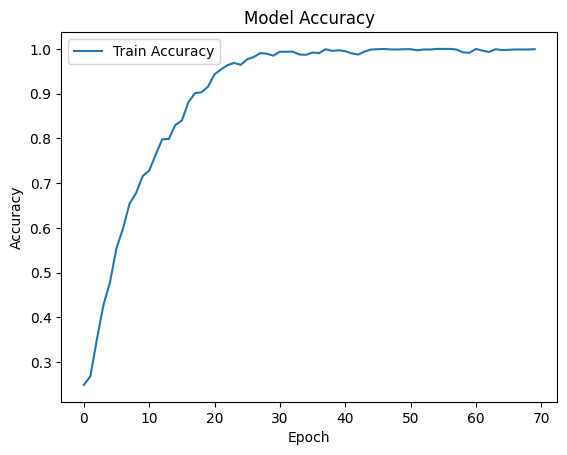

In [ ]:
plt.plot(h.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy'], loc='upper left')
plt.show()

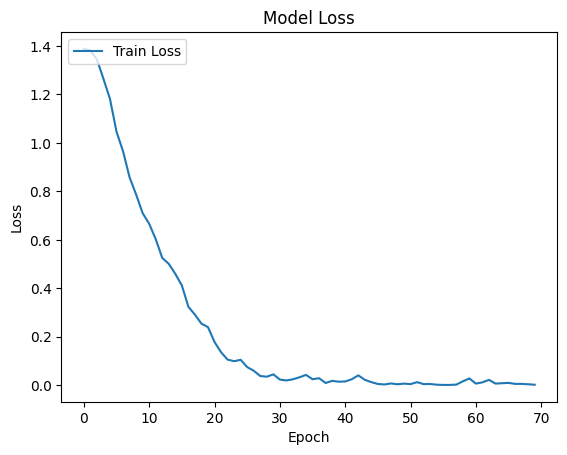

In [ ]:
plt.plot(h.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss'], loc='upper left')
plt.show()

# model.save('my_model.h5')

In [ ]:
N = 200
x_test = np.zeros((N, 112, 112, 3), 'float')
y_test = np.zeros((N), 'float')

count = 0
class_labels = sorted(os.listdir("Dataset/test"))
for i, class_label in enumerate(class_labels):
    image_files = sorted(os.listdir(os.path.join("Dataset/test", class_label)))
    for image_file in image_files:
        im = cv2.imread(os.path.join("Dataset/test", class_label, image_file), cv2.IMREAD_COLOR)
        im = cv2.resize(im, (112, 112))
        x_test[count] = im / 255.
        y_test[count] = i
        count += 1

y_test = to_categorical(y_test)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_test (200, 112, 112, 3)
y_test (200, 4)


In [ ]:
# Make predictions on the test data
y_pred = model.predict(x_test)

# Get the class predictions and confidence scores
class_preds = y_pred.argmax(axis=1)
confidences = np.max(y_pred, axis=-1)

# Define the class names
class_names = ['B', 'D', 'R', 'S']

# Define the test data directory
test_dir = 'Dataset/test/'

test_images = []
for class_folder in os.listdir(test_dir):
    class_folder_path = os.path.join(test_dir, class_folder)
    if os.path.isdir(class_folder_path):
        for image_file in os.listdir(class_folder_path):
            if image_file.endswith('.jpg'):
                image_path = os.path.join(class_folder_path, image_file)
                test_images.append(image_path)


7/7 [==============================] - 1s 160ms/step


In [ ]:
# Save the predictions to a file
with open('predictions.txt', 'w') as f:
    for i in range(len(test_images)):
        image_name = os.path.basename(test_images[i])
        class_name = class_names[class_preds[i]]
        confidence = confidences[i]
        f.write("{}: ,{}\n".format(
            image_name, class_name))

In [ ]:
# Evaluate model on test dataset
loss, accuracy = model.evaluate(x_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy*100)

7/7 [==============================] - 1s 171ms/step - loss: 1.3653 - accuracy: 0.8000
Test loss: 1.365330457687378
Test accuracy: 80.0000011920929


In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=-1), class_preds)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[45  0  2  3]
 [ 3 41  3  3]
 [ 0  9 40  1]
 [ 7  9  0 34]]
